In [1]:
import numpy as np
import scipy.io as sio
import glob 
from tqdm import tqdm_notebook
import os
import matplotlib
import matplotlib.pyplot as plt

from tools.morlet.CB_Morlet import Morlet

In [2]:
# ALGORITHM TO CLASSIFY BEHAVIOR
CB = Morlet()
data_pathnames = glob.glob('data/h5data/*.h5')

bp_datapath = "data/bpdata_npy"

for data_path in tqdm_notebook(data_pathnames):
    CB.import_data(data_path)
    print("FINISHED Importing Data")
    CB.rot_trans_data(bp_datapath)
    print("FINISHED Rotating & Translating Data")

FINISHED Importing Data
FINISHED Rotating & Translating Data
FINISHED Importing Data
FINISHED Rotating & Translating Data
FINISHED Importing Data
FINISHED Rotating & Translating Data
FINISHED Importing Data
FINISHED Rotating & Translating Data
FINISHED Importing Data
FINISHED Rotating & Translating Data



In [3]:
# INPUT DATA
data_pathnames = glob.glob('data/bpdata_npy/*.npy')
mat_datapath = "MotionMapper/data_mat/bpdata_bank"
# RUN SPECTROGRAM ALGORITHM
num_files = len(data_pathnames)
for idx, data_path in tqdm_notebook(enumerate(data_pathnames)):
    filename = os.path.splitext(os.path.basename(data_path))[0]
    bp_test = np.load(data_path)[:,0:2,:]
    bp_mod = np.delete(bp_test, 2, 0) # take out center bp of all 0 data
    # RESHAPE DATA TO [N_frame x features]
    bp_test_mod = bp_mod.reshape(58,-1).T 
    bp_test_mod = bp_test_mod - np.mean(bp_test_mod, axis=0)
    # SAVE DATA AS .mat
    sio.savemat(mat_datapath+"/"+filename+".mat",{"projections":bp_test_mod})
    print(bp_test_mod.shape)

(5913, 58)
(2895, 58)
(5901, 58)
(5901, 58)
(5270, 58)



<h1><center>TEST</center></h1>

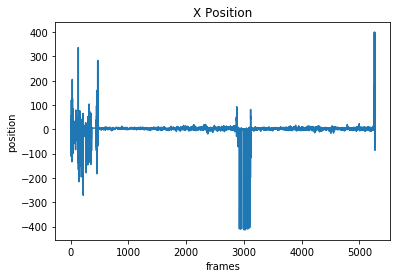

X mean: -0.0


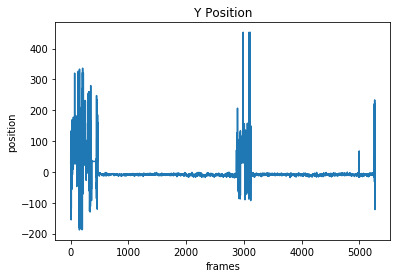

Y mean: 0.0


In [12]:
# X Position
bp_x = 4
plt.plot(bp_test_mod[:,bp_x])
plt.xlabel("frames")
plt.ylabel("position")
plt.title("X Position")
plt.show()
print("X mean: " + str(round(np.mean(bp_test_mod[:,bp_x]), 4)))
# Y Position
bp_y = 5
plt.plot(bp_test_mod[:,bp_y])
plt.xlabel("frames")
plt.ylabel("position")
plt.title("Y Position")
plt.show()
print("Y mean: " + str(round(np.mean(bp_test_mod[:,bp_y]), 4)))